In [1]:
from file_listing import *
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set()

%matplotlib inline

In [2]:
basedir = '/media/cocoan-gpu1/wani8T/data/deeppain'

In [3]:
study_name = ['study01_bmrk3', 'study02_bmrk4', 'study03_nsf', 'study04_ie', 'study05_exp', 'study06_ilcp']

In [4]:
in_condition_1 = ['study06_ilcp']
in_condition_2 = ['subject']
out_conidtion = ['nopain']

In [5]:
search_list = dir_search(basedir=basedir, in_condition_1=in_condition_1,in_condition_2=in_condition_2,
                         out_conidtion=out_conidtion)

In [6]:
beta_list = []
for dirpath in search_list:
    beta_list.append(os.listdir(dirpath))

In [7]:
data_shape = np.load(os.path.join(search_list[0],beta_list[0][0])).shape

all_beta_length = 0
beta_length_list = []
for i in range(len(beta_list)):
    all_beta_length += len(beta_list[i])
    beta_length_list.append(len(beta_list[i]))
print(all_beta_length)

beta_data = np.empty((all_beta_length, data_shape[0], data_shape[1], data_shape[2]))
print(beta_data.shape)

index = 0
for i in tqdm_notebook(range(len(search_list))):
    for j in range(len(beta_list[i])):
        path = os.path.join(search_list[i],beta_list[i][j])
        temp_data = np.load(path)
        
        beta_data[index] = temp_data
        index+=1

1826
(1826, 79, 95, 68)


In [8]:
mean = beta_data.mean()
std = beta_data.std()

print(mean)
print(std)

standard_beta_data = (beta_data-mean)/std

print(standard_beta_data.mean())
print(standard_beta_data.std())

-0.00040993023830834937
0.41395049706040615
5.0092748790205965e-18
0.9999999999999998


In [9]:
del beta_data

In [10]:
standard_beta_basedir = '/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study'
index = 0

for t in tqdm_notebook(range(len(search_list))):
    if 'subject' in search_list[t]:
        # file_name example : '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001'
        study_name = os.path.basename(os.path.dirname(search_list[t]))
        sub_name = os.path.basename(search_list[t])
        
        folder_dir = os.path.join(standard_beta_basedir,study_name)
        if not os.path.exists(folder_dir):
            os.mkdir(folder_dir) 
        
        sub_folder_dir = os.path.join(folder_dir, sub_name)
        if not os.path.exists(sub_folder_dir):
            os.mkdir(sub_folder_dir)
        
        if t == 0:
            index += beta_length_list[t]
            temp_beta = standard_beta_data[:index,:,:,:]

        else:
            temp_beta = standard_beta_data[index:index+ beta_length_list[t],:,:,:]
            index += beta_length_list[t]

        for i in range(len(temp_beta)):
            file_name = 'bata{:04d}.npy'.format(i+1)
            full_file_dir = os.path.join(sub_folder_dir, file_name)
            np.save(full_file_dir, temp_beta[i,:,:,:])

            print(full_file_dir)
        
        del temp_beta

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0001.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0002.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0003.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0004.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0005.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0006.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0007.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0008.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0009.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject155/bata0010.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0025.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0026.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0027.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0028.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0029.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0030.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0031.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0032.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0033.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject156/bata0034.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0001.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0002.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0003.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0004.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0005.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0006.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0007.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0008.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0009.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject158/bata0010.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0035.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0036.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0037.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0038.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0039.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0040.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0041.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0042.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0043.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject159/bata0044.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0004.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0005.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0006.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0007.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0008.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0009.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0010.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0011.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0012.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject161/bata0013.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0038.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0039.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0040.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0041.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0042.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0043.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0044.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0045.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0046.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject162/bata0047.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0008.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0009.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0010.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0011.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0012.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0013.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0014.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0015.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0016.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject164/bata0017.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0043.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0044.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0045.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0046.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0047.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0048.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0049.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0050.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0051.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject165/bata0052.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0012.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0013.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0014.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0015.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0016.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0017.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0018.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0019.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0020.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject167/bata0021.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0036.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0037.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0038.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0039.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0040.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0041.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0042.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0043.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0044.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject168/bata0045.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject169/bata0059.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject169/bata0060.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject169/bata0061.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject169/bata0062.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject169/bata0063.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject169/bata0064.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject170/bata0001.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject170/bata0002.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject170/bata0003.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject170/bata0004.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0018.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0019.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0020.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0021.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0022.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0023.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0024.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0025.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0026.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject171/bata0027.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0043.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0044.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0045.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0046.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0047.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0048.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0049.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0050.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0051.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject172/bata0052.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0006.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0007.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0008.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0009.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0010.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0011.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0012.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0013.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0014.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject174/bata0015.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0030.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0031.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0032.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0033.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0034.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0035.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0036.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0037.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0038.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject175/bata0039.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0057.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0058.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0059.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0060.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0061.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0062.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0063.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject176/bata0064.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject177/bata0001.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject177/bata0002.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0022.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0023.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0024.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0025.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0026.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0027.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0028.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0029.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0030.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject178/bata0031.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0045.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0046.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0047.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0048.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0049.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0050.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0051.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0052.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0053.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject179/bata0054.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0021.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0022.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0023.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0024.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0025.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0026.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0027.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0028.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0029.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject181/bata0030.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0053.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0054.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0055.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0056.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0057.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0058.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0059.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0060.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject182/bata0061.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_bt_study/study06_ilcp/subject183/bata0001.npy
/media/cocoan-gpu1/wani8T/data/deeppain_standard_b

In [12]:
for i in range(len(beta_length_list)):
    print(i+155, beta_length_list[i])

155 64
156 61
157 63
158 64
159 63
160 62
161 64
162 64
163 62
164 64
165 64
166 63
167 63
168 64
169 64
170 64
171 63
172 64
173 64
174 63
175 61
176 64
177 59
178 64
179 63
180 64
181 62
182 61
183 61


In [11]:
flat_beta_data = np.reshape(beta_data, (-1, 79*95*68))

In [12]:
flat_standard_beta_data = np.reshape(standard_beta_data, (-1,79*95*68))

In [13]:
flat_beta_data_range_list = []
flat_standard_beta_data_range_list = []

for i in range(len(flat_beta_data)):
    beta_range = flat_beta_data[i].max() - flat_beta_data[i].min()
    flat_beta_data_range_list.append(beta_range)
    
    standard_beta_range = standard_beta_data[i].max() - standard_beta_data[i].min()
    flat_standard_beta_data_range_list.append(standard_beta_range)

(array([272., 613., 354., 148.,  71.,  25.,   5.,   5.,   5.,   2.]),
 array([ 2.88376236,  5.8565486 ,  8.82933483, 11.80212107, 14.7749073 ,
        17.74769354, 20.72047977, 23.69326601, 26.66605225, 29.63883848,
        32.61162472]),
 <a list of 10 Patch objects>)

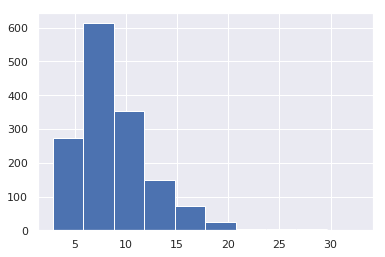

In [14]:
plt.hist(flat_beta_data_range_list)

(array([272., 613., 354., 148.,  71.,  25.,   5.,   5.,   5.,   2.]),
 array([  9.13383338,  18.54963494,  27.96543651,  37.38123807,
         46.79703964,  56.2128412 ,  65.62864276,  75.04444433,
         84.46024589,  93.87604746, 103.29184902]),
 <a list of 10 Patch objects>)

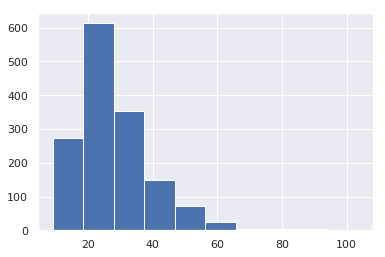

In [15]:
plt.hist(flat_standard_beta_data_range_list)